# Workflow using MTpy, MTH5 for Seogi

This notebook is to help Seogi with a workflow for using `MTCollection` as a data base to store tranfer functions and model responses.  The benefits are that Seogi will not have to write plotting codes, good test for the versitility of `MTCollection`, and demonstrate interoperability with Simpeg.


## Getting Started

The most up-to-date versions of MTH5 and mt-metadata can be installed using PIP, the conda-forge versions are awaiting approval, so they may be available after time of writing this.  

You can always clone the repositories at:

   - [MTH5](https://github.com/kujaku11/mth5.git)
   - [MT Metadata](https://github.com/kujaku11/mt_metadata.git)
   - [MTpy](https://github.com/MTgeophysics/mtpy/tree/v2)  Be sure to clone the `v2` branch
   
If you use PIP then you can just install MTpy and it should install the latest versions of MTH5 and MT Metadata.

CD into unzipped repo from MTpy and run:

```
> pip install -e .
```



## Creating an MTCollection from transfer functions

Here we will create an `MTCollection` object from transfer functions downloaded from IRIS. Have a look at the notebook in `mt_examples/notebooks/mtpy/mt_shortcourse_mt_collection_ys.ipynb` to build an MTH5.  I've already built one and have included it in the zip file `mt_examples/data/transfer_functions/yellowstone_mt_collection.h5`.

In [1]:
%matplotlib inline
from mtpy import MTCollection
import inspect

2022-09-26 09:55:45,501 [line 135] error.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\mtpy_error.log
2022-09-26 09:55:45,504 [line 135] matplotlib.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\matplotlib_warn.log
2022-09-26 09:55:48,265 [line 44] mtpy.utils.gis_tools.<module> - INFO: INFO: GDAL version 3 detected
2022-09-26 09:55:49,266 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log


In [2]:
mc = MTCollection()
mc.open_collection(r"c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mt_examples\data\transfer_functions\yellowstone_mt_collection.h5")

## Contents of the MTCollection

`MTCollection` has a property called `dataframe` that summarizes all transfer functions within the file. 

In [4]:
mc.dataframe

,station,survey,latitude,longitude,elevation,tf_id,units,has_impedance,has_tipper,has_covariance,period_min,period_max,hdf5_reference,station_hdf5_reference
0,IDD11,Transportable_Array,47.043986,-116.345982,850.750,IDD11,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
1,IDD12,Transportable_Array,47.047800,-115.348000,1137.862,IDD12,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
2,IDE11,Transportable_Array,46.353000,-116.212965,882.625,IDE11,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
3,IDE12,Transportable_Array,46.387100,-115.582000,1633.900,IDE12,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
4,IDF11,Transportable_Array,45.889496,-116.157113,1175.550,IDF11,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,SR930,Yellowstone-Snake_River_Plain,43.188800,-113.042300,1568.050,SR930,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
217,SR954,Yellowstone-Snake_River_Plain,43.689700,-112.375700,1536.925,SR954,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
218,SR966,Yellowstone-Snake_River_Plain,43.948300,-112.039000,1486.875,SR966,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>
219,SR980,Yellowstone-Snake_River_Plain,44.258100,-111.553000,2075.900,SR980,none,True,True,True,7.31429,18724.57,<HDF5 object reference>,<HDF5 object reference>


## Get a Transfer Function

To get a transfer function you just need to know the transfer function ID (`tf_id`) and the survey ID (`survey_id`) that transfer function belongs to. You can get this from the `dataframe`.

For example in the first row you can get the transfer function for `IDD11` from survey `Transportable_Array` like this

Note that survey is optional, it will search for the transfer function given and if there are repeated transfer functions it will return the first one in the list.

In [7]:
tf = mc.get_tf("IDD11", survey="Transportable_Array")
print(tf)

Station: IDD11
--------------------------------------------------
	Survey:            Transportable Array
	Project:           USArray
	Acquired by:       GSY-USA, Inc.
	Acquired date:     2007-10-02
	Latitude:          47.044
	Longitude:         -116.346
	Elevation:         850.750
	Declination:   
		Value:     16.4
		Model:     WMM
	Coordinate System: geographic
	Impedance:         True
	Tipper:            True
	N Periods:     30
	Period Range:
		Min:   7.31429E+00 s
		Max:   1.87246E+04 s
	Frequency Range:
		Min:   5.34058E-05 Hz
		Max:   1.36719E-01 Hz


### MT Object

Now `tf` is a `mtpy.core.MT` object which contains metadata and data.  This includes 

  - `survey_metadata`: metadata about the survey
  - `station_metadata`: metadata about the station
  
      - `station_metadata` contains run metadata as a list of `runs` and each `run` has a list of `channels` that containse metadata about each channel.  
      
This isn't extremely important for modeling but its good to know its there, cause we might have to fill some in when making `MT` objects.  

The important attributes are

  - `transfer_function`: full transfer function including induction vectors
  - `transfer_function_error`: full tranfer function estimated errors
  - `Z`: `mtpy.core.z.Z` object that is a convenience object to deal with the impedance tensor.  Has attributes for resistivity and phase and components.
  - `Tipper`: `mtpy.core.z.Tipper` object that is a convenience object to deal with induction vectors.

### Z Object

This has attributes for resistivity and phase with errors. If you set `resistivity` and `phase` the impedance tensor will automatically be updated. If you set the impedance `compute_resistivity_phase` will be called and `resistivity` and `phase` will be updated.  

Attributes like `res_xy` are properties that are conveniences to get a single component.  These cannot be set.

Attributes are:

In [14]:
print("\n".join([attr for attr in dir(tf.Z) if not attr.startswith("_")]))

compute_resistivity_phase
copy
det
det_err
freq
invariants
inverse
norm
norm_err
only_1d
only_2d
period
phase
phase_det
phase_err
phase_err_det
phase_err_xx
phase_err_xy
phase_err_yx
phase_err_yy
phase_xx
phase_xy
phase_yx
phase_yy
remove_distortion
remove_ss
res_det
res_err_det
res_err_xx
res_err_xy
res_err_yx
res_err_yy
res_xx
res_xy
res_yx
res_yy
resistivity
resistivity_err
rotate
rotation_angle
set_res_phase
skew
skew_err
trace
trace_err
z
z_err


#### Methods

There are a few important methods mainly `rotate`, which will rotate the data assuming north is 0 and positive clockwise east.  

In [18]:
print("\n".join([method[0] for method in inspect.getmembers(tf.Z, predicate=inspect.ismethod) if not method[0].startswith("_")]))

compute_resistivity_phase
copy
remove_distortion
remove_ss
rotate
set_res_phase


In [9]:
tf.Z

Impedance Tensor
------------------------------
	Number of frequencies:  30
	Frequency range:        5.34058E-05 -- 1.36719E-01 Hz
	Period range:           7.31429E+00 -- 1.87246E+04 s

	Elements:
	Frequency: 1.367187E-01 Hz -- Period 7.314290000000001 s
		[[-3.7979e-01+7.0525E-01 1.1643e+00+4.2449E+00]
		 [1.1633e+00-2.1057E+01 1.7072e+00-4.0688E+00]]
	Frequency: 1.093750E-01 Hz -- Period 9.14286 s
		[[-2.7861e-01+1.2734E+00 2.6724e+00+4.0635E+00]
		 [-4.3746e+00-1.6515E+01 -1.2499e+00-2.2234E+00]]
	Frequency: 8.593753E-02 Hz -- Period 11.63636 s
		[[-5.9729e-01+1.0194E+00 2.0795e+00+3.7943E+00]
		 [-5.9045e+00-1.2489E+01 -2.9241e-01-1.4704E+00]]
	Frequency: 6.640627E-02 Hz -- Period 15.05882 s
		[[-6.9203e-01+6.7845E-01 1.8034e+00+3.0724E+00]
		 [-3.8336e+00-1.0223E+01 3.4329e-02-8.9945E-01]]
	Frequency: 5.078124E-02 Hz -- Period 19.69231 s
		[[-7.1237e-01+3.9022E-01 1.4019e+00+2.5853E+00]
		 [-3.3221e+00-7.7567E+00 9.6271e-02-9.3362E-01]]
	Frequency: 3.906250E-02 Hz -- Period 25.6 s

In [19]:
tf.Z.resistivity

array([[[9.38599383e-01, 2.83420182e+01],
        [6.50614774e+02, 2.84819090e+01]],

       [[3.10719864e+00, 4.32524864e+01],
        [5.33757856e+02, 1.18964352e+01]],

       [[3.24873203e+00, 4.35686931e+01],
        [4.44116054e+02, 5.23075670e+00]],

       [[2.82865456e+00, 3.82250848e+01],
        [3.58996380e+02, 2.44011146e+00]],

       [[2.59836034e+00, 3.40646334e+01],
        [2.80427885e+02, 3.46941381e+00]],

       [[1.79971705e+00, 3.03592694e+01],
        [2.53838632e+02, 2.33440466e+00]],

       [[1.57097880e+00, 2.91217409e+01],
        [2.13075515e+02, 1.23966096e+00]],

       [[1.11005300e+00, 2.65649253e+01],
        [2.19362295e+02, 1.07232834e+00]],

       [[1.00063431e+00, 2.53727993e+01],
        [2.29002938e+02, 1.78822062e+00]],

       [[1.05850246e+00, 2.41217637e+01],
        [2.09820918e+02, 7.03347284e-01]],

       [[1.02982000e+00, 2.42193989e+01],
        [1.92001264e+02, 1.66390675e-01]],

       [[9.09482478e-01, 2.43405004e+01],
        [1.9

#### Plotting

For plotting there are 2 methods

  - `plot_mt_response` will plot the apparent resistivity, phase, induction vectors, and phase tensors if desired.
  - `plot_pt` will plot phase tensor and cooresponding parameters that help with dimensionality analysis. 

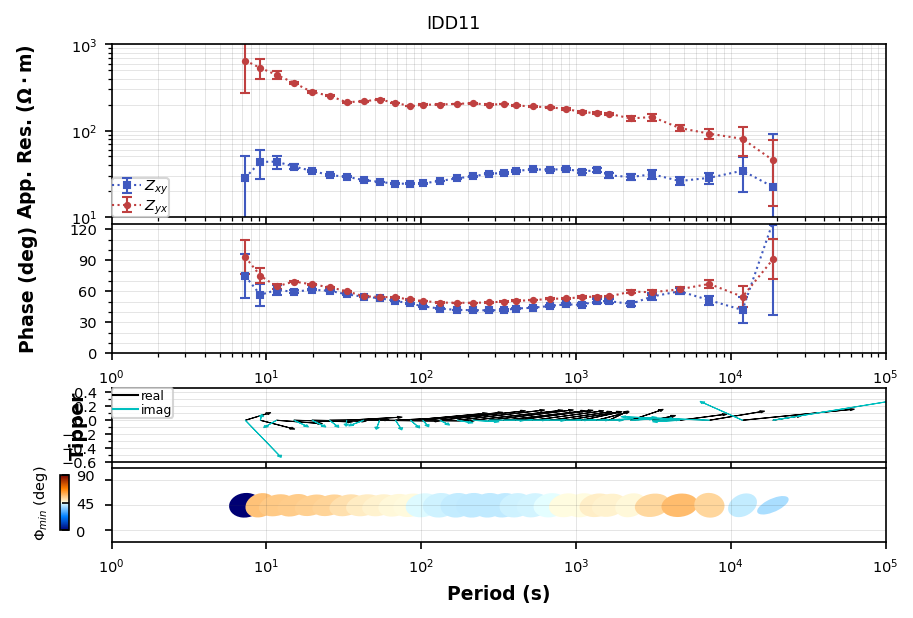

In [8]:
plot_response = tf.plot_mt_response()

Plotting the phase tensor and invariants can help decipher dimensionality of the MT response and what is the proper dimension to model in. For example if the skew angle is large than |6| then you may be in a 3D environment. Or if the ellipticity is larger than 0.1.  This can also provide an estimation for strike if you are doing a 2D model.    

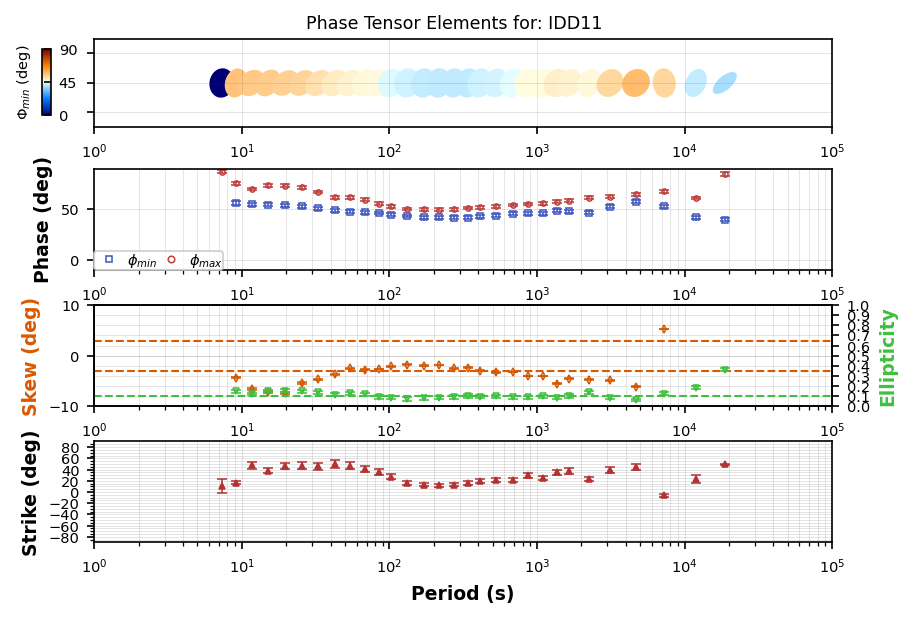

In [20]:
pt_plot = tf.plot_phase_tensor()

### Creating a MT object

For modeling we'll need to make a transfer function from the model response.  We can do that by creating an MT object and then adding it to the `MTCollection`.There are a couple ways to do this, but since you are likely to be outputting apparent resistivity and phase lets set those in the `Z` object.  

The resistivity and phase will have to have the shape (number_of_frequencies, 2, 2).

In [3]:
import numpy as np
from mtpy import MT
from mtpy.core.z import Z

First create empty arrays to fill in with values, from a 1D or 2D model.

In [24]:
n_frequencies = 10
# set the apparent resistivity and phase from made up numbers
frequencies = np.logspace(-3, 3, n_frequencies)
apparent_resistivity = np.zeros((n_frequencies, 2, 2), dtype=float)
phase = np.zeros_like(apparent_resistivity)

Now fill in the values for the xy mode (or TE) mode.

In [25]:
apparent_resistivity[:, 0, 1] = np.array([10, 12, 15, 20, 50, 100, 300, 250, 200, 100])
phase[:, 0, 1] = np.array([45, 40, 35, 30, 25, 20, 25, 35, 40, 50])

Create an empty `Z` object and then set the resistivity and phase using the `set_res_phase` method.  

In [31]:
z_object = Z()

In [34]:
z_object.set_res_phase(apparent_resistivity, phase, frequencies)

In [36]:
z_object.res_xy

array([ 10.,  12.,  15.,  20.,  50., 100., 300., 250., 200., 100.])

In [39]:
z_object.z[0]

array([[0.        +0.j        , 0.15811388+0.15811388j],
       [0.        +0.j        , 0.        +0.j        ]])

### Build the MT object

Now that we have a `Z` object we can build an `MT` object and make a response station.

In [40]:
response = MT()

In [41]:
response.Z = z_object

In [43]:
response.Z

Impedance Tensor
------------------------------
	Number of frequencies:  10
	Frequency range:        1.00000E-03 -- 1.00000E+03 Hz
	Period range:           1.00000E-03 -- 1.00000E+03 s

	Elements:
	Frequency: 1.000000E-03 Hz -- Period 1000.0 s
		[[0.0000e+00+0.0000E+00 1.5811e-01+1.5811E-01]
		 [0.0000e+00+0.0000E+00 0.0000e+00+0.0000E+00]]
	Frequency: 4.641589E-03 Hz -- Period 215.44346900318845 s
		[[0.0000e+00+0.0000E+00 4.0426e-01+3.3922E-01]
		 [0.0000e+00+0.0000E+00 0.0000e+00+0.0000E+00]]
	Frequency: 2.154435E-02 Hz -- Period 46.4158883361278 s
		[[0.0000e+00+0.0000E+00 1.0413e+00+7.2910E-01]
		 [0.0000e+00+0.0000E+00 0.0000e+00+0.0000E+00]]
	Frequency: 1.000000E-01 Hz -- Period 10.0 s
		[[0.0000e+00+0.0000E+00 2.7386e+00+1.5811E+00]
		 [0.0000e+00+0.0000E+00 0.0000e+00+0.0000E+00]]
	Frequency: 4.641589E-01 Hz -- Period 2.1544346900318843 s
		[[0.0000e+00+0.0000E+00 9.7629e+00+4.5525E+00]
		 [0.0000e+00+0.0000E+00 0.0000e+00+0.0000E+00]]
	Frequency: 2.154435E+00 Hz -- Period 0.4

Fill in some metadata so that we can store the transfer function in a logical way. 

This is the manual way.  You could also go another route.  If you use a response from this collection as input data, then you could just copy the metadata from that transfer function and just change the survey ID and station ID to something that makes sense.

In [56]:
response.survey_metadata.id = "model_1d_response"
response.station_metadata.id = "mt002"
response.station_metadata.transfer_function.id = "mt002"
# if this is 2D maybe we need a location
response.station_metadata.location.latitude = 40
response.station_metadata.location.longitude = -122

Add it to the `MTCollection`

In [57]:
mc.add_tf(response)

#### Plot the response against the data

If you pull the input data from the collection then you already know the `tf_id` that you would like to compare the response to.  So lets say you used station `IDD11` as your input data then we just need to get these 2 transfer functions, or provide them to the plotting method `plot_mt_response` and use keyword `plot_style='compare'`.

2022-09-26 09:56:45,131 [line 275] mtpy.core.mt_collection.MTCollection.get_tf - WARNING: Found multiple transfer functions with ID IDD11. Suggest setting survey, otherwise returning the TF from survey Transportable_Array.
2022-09-26 09:56:45,422 [line 275] mtpy.core.mt_collection.MTCollection.get_tf - WARNING: Found multiple transfer functions with ID mt002. Suggest setting survey, otherwise returning the TF from survey model_1d_response.


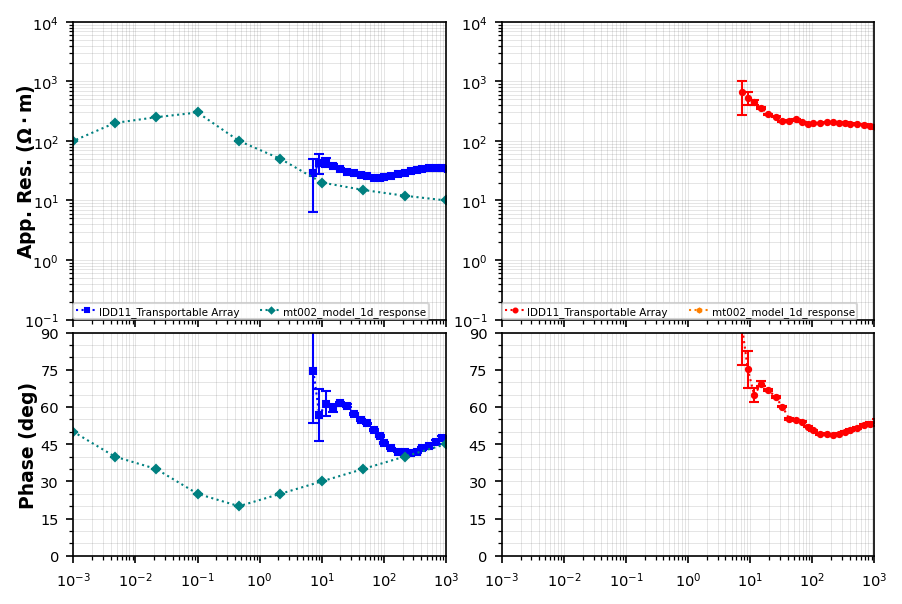

In [5]:
compare_plot = mc.plot_mt_response(["IDD11", "mt002"], plot_style="compare", plot_tipper='n')

In [6]:
mc.close_collection()

2022-09-26 09:57:50,907 [line 753] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mt_examples\data\transfer_functions\yellowstone_mt_collection.h5
